# Crimes in Boston
## More than 2,60,760 crimes in Boston (2015- 2018)

**Data**:  https://www.kaggle.com/ankkur13/boston-crime-data

This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

# 1. Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.cross_validation import train_test_split

/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn import linear_model
import statsmodels.api as sm

# 2. Read data

In [5]:
df = pd.read_csv('boston-crime-data/crime.csv', encoding='latin-1')

# 3. Function

## 3.1. Function for research

In [6]:
def print_five_rows(name_column):
    return df[name_column][0:5]

In [7]:
def describe_column(name_column):
    return df[name_column].describe()

## 3.2. Function for visualization

In [8]:
def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df.loc[df[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

In [9]:
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 0

In [10]:
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

## 3.3. Function for modeling and cleaning

In [11]:
def drop_NaN_two_var(x, y):

    df1 = df[[x, y]].dropna()
    print(df1.shape)

    x_value = df1[x]
    y_value = df1[y]

    del df1
        
    print(x + ': ' + str(x_value.shape))
    print(y + ': ' + str(y_value.shape))
        
    return x_value, y_value

In [12]:
def function_OLS_Regression(x, y):
    
    model = sm.OLS(y, x)
    res = model.fit()
    return res.summary()

# 4. First data research

In [13]:
df.shape

(303371, 17)

In [14]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

### 4.1. INCIDENT_NUMBER (*will delete*)

Number for incident. This indicator is **difficult** for visualization, modeling and other research. I will **not** use it.

In [15]:
print_five_rows('INCIDENT_NUMBER')

0    I182054381
1    I182054379
2    I182054378
3    I182054376
4    I182054374
Name: INCIDENT_NUMBER, dtype: object

In [16]:
describe_column('INCIDENT_NUMBER')

count         303371
unique        268724
top       I162030584
freq              13
Name: INCIDENT_NUMBER, dtype: object

In [17]:
df = df.drop('INCIDENT_NUMBER', 1)

### 4.2. OFFENSE_CODE

Code for offence. Maybe, i will use for statistics research and modeling.

In [18]:
print_five_rows('OFFENSE_CODE')

0    3301
1    3114
2     619
3     617
4    3410
Name: OFFENSE_CODE, dtype: int64

In [19]:
len(df['OFFENSE_CODE'].unique())

221

### 4.3. OFFENSE_CODE_GROUP

Code for offence`s group. Maybe, i will use for statistics research and modeling.

In [20]:
print_five_rows('OFFENSE_CODE_GROUP')

0         Verbal Disputes
1    Investigate Property
2                 Larceny
3                 Larceny
4                   Towed
Name: OFFENSE_CODE_GROUP, dtype: object

In [21]:
describe_column('OFFENSE_CODE_GROUP')

count                              303371
unique                                 67
top       Motor Vehicle Accident Response
freq                                35342
Name: OFFENSE_CODE_GROUP, dtype: object

### 4.4. OFFENSE_DESCRIPTION

Description for offence. Maybe, i will use for statistics research and modeling.

In [22]:
print_five_rows('OFFENSE_DESCRIPTION')

0                 VERBAL DISPUTE
1           INVESTIGATE PROPERTY
2             LARCENY ALL OTHERS
3    LARCENY THEFT FROM BUILDING
4            TOWED MOTOR VEHICLE
Name: OFFENSE_DESCRIPTION, dtype: object

In [23]:
describe_column('OFFENSE_DESCRIPTION')

count                 303371
unique                   243
top       INVESTIGATE PERSON
freq                   17871
Name: OFFENSE_DESCRIPTION, dtype: object

### 4.5. DISTRICT

District. I will use it for reaearch, modeling and visualization.

In [24]:
print_five_rows('DISTRICT')

0     B3
1    E18
2     B2
3     E5
4     C6
Name: DISTRICT, dtype: object

In [25]:
describe_column('DISTRICT')

count     301728
unique        12
top           B2
freq       47770
Name: DISTRICT, dtype: object

In [26]:
df['DISTRICT'].unique()

array(['B3', 'E18', 'B2', 'E5', 'C6', 'D14', 'E13', 'C11', 'D4', 'A7', nan,
       'A1', 'A15'], dtype=object)

### 4.6. REPORTING_AREA

In [27]:
print_five_rows('REPORTING_AREA')

0    428
1    481
2    182
3    714
4    211
Name: REPORTING_AREA, dtype: object

In [28]:
describe_column('REPORTING_AREA')

count     303371
unique       879
top             
freq       19130
Name: REPORTING_AREA, dtype: object

### 4.7. SHOOTING

In [29]:
print_five_rows('SHOOTING')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: SHOOTING, dtype: object

In [30]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

### 4.8. OCCURRED_ON_DATE

In [31]:
print_five_rows('OCCURRED_ON_DATE')

0    2018-07-10 20:57:00
1    2018-07-10 21:16:00
2    2018-07-10 21:27:00
3    2018-07-10 18:39:00
4    2018-07-10 20:11:00
Name: OCCURRED_ON_DATE, dtype: object

### 4.9. YEAR

In [32]:
print_five_rows('YEAR')

0    2018
1    2018
2    2018
3    2018
4    2018
Name: YEAR, dtype: int64

### 4.10. MONTH

In [33]:
df['MONTH'].unique()

array([ 7,  6,  4,  5,  1,  8, 12,  2,  3,  9, 10, 11])

### 4.11. DAY_OF_WEEK

In [34]:
df['DAY_OF_WEEK'].unique()

array(['Tuesday', 'Saturday', 'Monday', 'Sunday', 'Thursday', 'Wednesday',
       'Friday'], dtype=object)

### 4.12. HOUR

In [35]:
df['HOUR'].unique()

array([20, 21, 18, 19, 14,  7,  5, 17, 15, 10, 12, 16, 11,  0,  8, 13,  9,
       23,  2,  1,  6,  3,  4, 22])

### 4.13. UCR_PART

In [36]:
df['UCR_PART'].unique()

array(['Part Three', 'Part One', 'Part Two', 'Other', nan], dtype=object)

### 4.14. STREET

In [37]:
print_five_rows('STREET')

0    BLUE HILL AVE
1      ROCKDALE ST
2    BATCHELDER ST
3         VOGEL ST
4       W THIRD ST
Name: STREET, dtype: object

In [38]:
describe_column('STREET')

count            292753
unique             4595
top       WASHINGTON ST
freq              13504
Name: STREET, dtype: object

### 4.15. Lat / Long

In [39]:
df[['Lat', 'Long']].head()

,Lat,Long
0,42.282829,-71.091825
1,42.266525,-71.098553
2,42.322496,-71.069092
3,42.262539,-71.165069
4,42.338964,-71.048964


In [40]:
describe_column('Lat')

count    284532.000000
mean         42.221680
std           2.085899
min          -1.000000
25%          42.297521
50%          42.325538
75%          42.348624
max          42.395042
Name: Lat, dtype: float64

In [41]:
describe_column('Long')

count    284532.000000
mean        -70.920017
std           3.374111
min         -71.178674
25%         -71.097131
50%         -71.077497
75%         -71.062492
max          -1.000000
Name: Long, dtype: float64

### 4.16. Location

In [42]:
df['Location'].head()

0    (42.28282878, -71.09182490)
1    (42.26652466, -71.09855320)
2    (42.32249601, -71.06909180)
3    (42.26253888, -71.16506913)
4    (42.33896439, -71.04896420)
Name: Location, dtype: object

# 5. Visualization

### 5.1. District

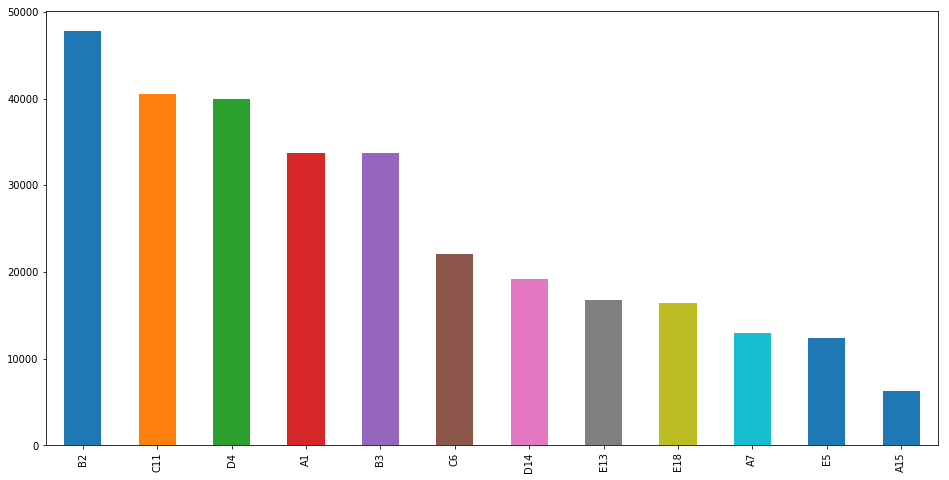

In [43]:
plt.figure(figsize=(16,8))
df['DISTRICT'].value_counts().plot.bar()
plt.show()

### 5.2. Total number crime for each year

In [44]:
list_unique_year, list_number_year = create_list_number_crime('YEAR',df['YEAR'].unique())

In [45]:
# pie_plot(list_unique_year, list_number_year)

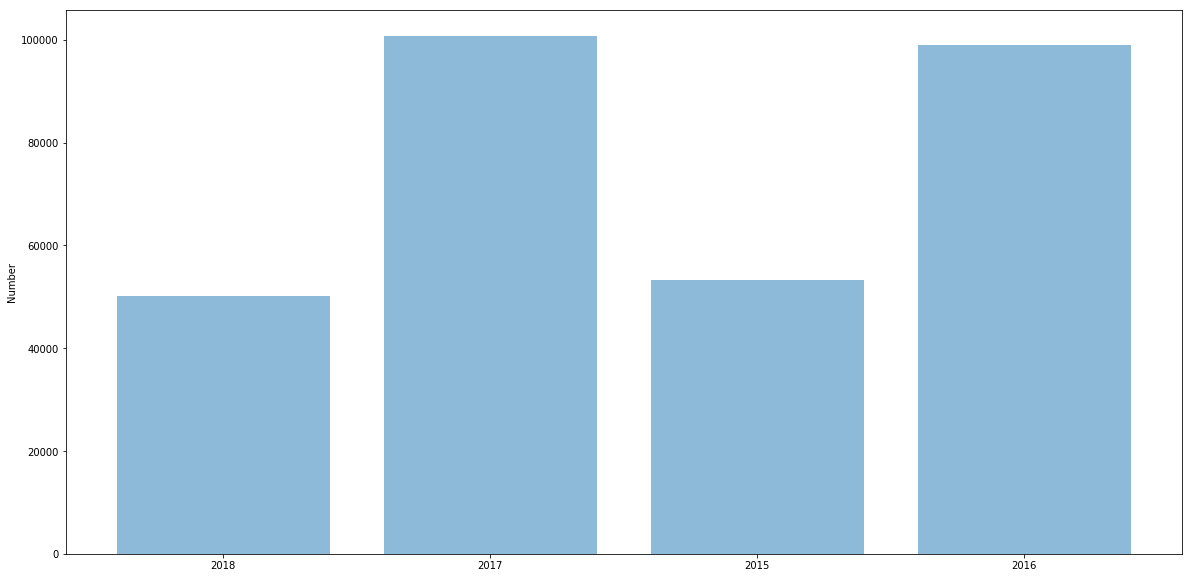

0

In [46]:
bar_chart(list_number_year,list_unique_year)

### 5.3.  Total number crime for each month

In [47]:
list_unique_month, list_number_month = create_list_number_crime('MONTH',list(range(1,13)))

In [48]:
# pie_plot(list_unique_month,list_number_month)

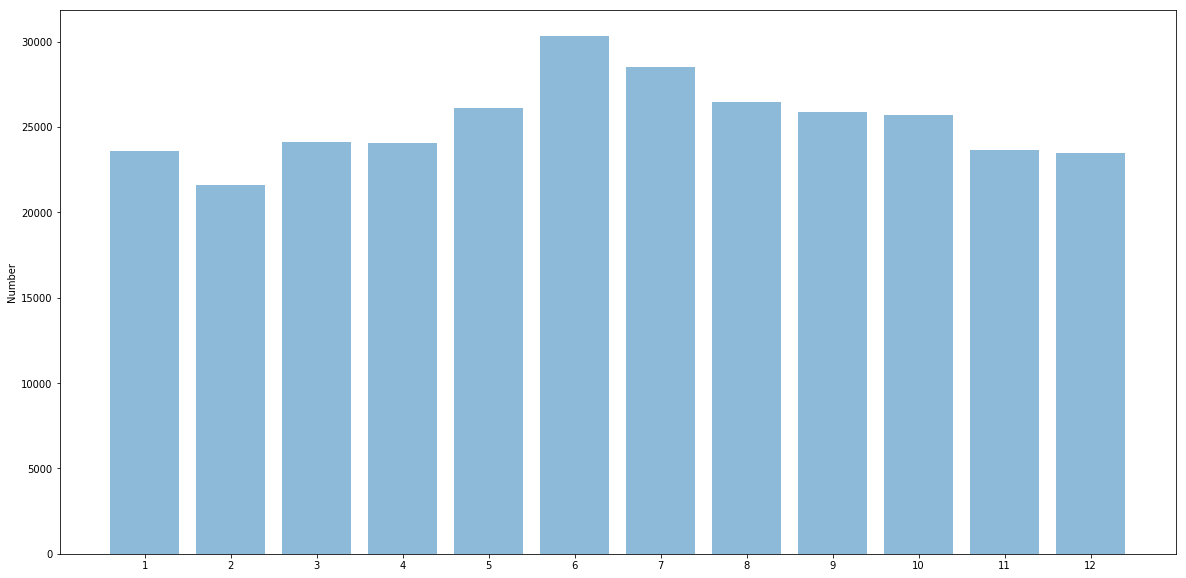

0

In [49]:
bar_chart(list_number_month,list_unique_month)

### 5.4. Total number crime for each day of week

In [50]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

In [51]:
list_unique_day, list_number_day = create_list_number_crime('DAY_OF_WEEK',day_of_week)

In [52]:
#pie_plot(list_unique_day,list_number_day)

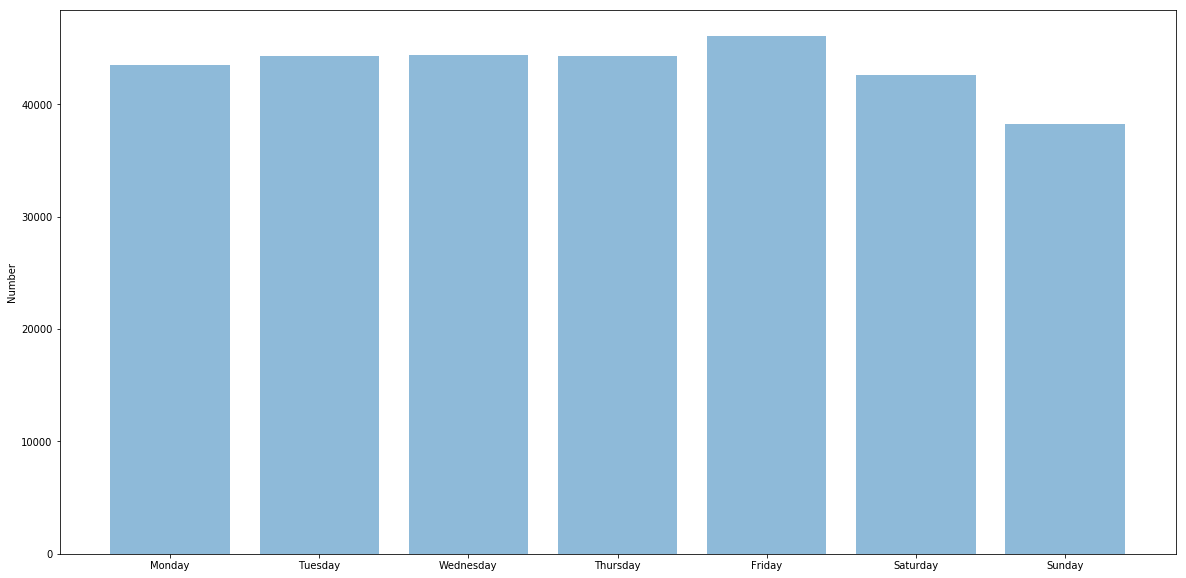

0

In [53]:
bar_chart(list_number_day,list_unique_day)

### 5.5. Total number crime for each hour

In [54]:
list_unique_hour, list_number_hour = create_list_number_crime('HOUR',list(range(0,24)))

In [55]:
# pie_plot(list_unique_hour, list_number_hour)

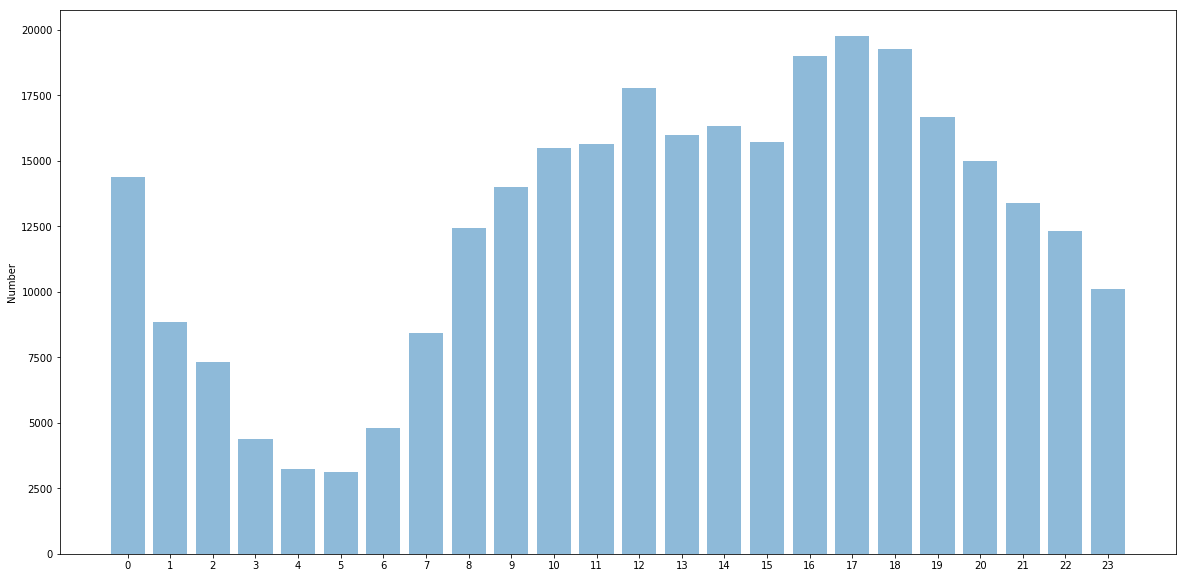

0

In [56]:
bar_chart(list_number_hour,list_unique_hour)

### 5.6. SHOOTING

In [57]:
df['SHOOTING'].fillna(0, inplace = True)

df['SHOOTING'] = df['SHOOTING'].map({
    0: 0,
    'Y':1
})

In [58]:
shoot_true = len(df.loc[df['SHOOTING'] == 1])
shoot_false = len(df.loc[df['SHOOTING'] == 0])

In [59]:
print('With shooting(num): ' + str(shoot_true))
print('With shooting(%):   ' + str(round(shoot_true*100/len(df),2))+'%')
print()
print('Without shooting(num): ' + str(shoot_false))
print('Without shooting(%):   ' + str(round(shoot_false*100/len(df),2))+'%')

With shooting(num): 969
With shooting(%):   0.32%

Without shooting(num): 302402
Without shooting(%):   99.68%


In [60]:
df_shoot = df.loc[df['SHOOTING'] == 1]
df_shoot.shape

(969, 16)

#### 5.6.1. Shooting & year

In [61]:
shoot_y_2015 = len(df_shoot.loc[df_shoot['YEAR'] == 2015])
shoot_y_2016 = len(df_shoot.loc[df_shoot['YEAR'] == 2016])
shoot_y_2017 = len(df_shoot.loc[df_shoot['YEAR'] == 2017])
shoot_y_2018 = len(df_shoot.loc[df_shoot['YEAR'] == 2018])

unique_shoot_year = '2015', '2016', '2017', '2018'
number_shoot_year = [shoot_y_2015, shoot_y_2016, shoot_y_2017, shoot_y_2018]

In [62]:
# pie_plot(unique_shoot_year,number_shoot_year)

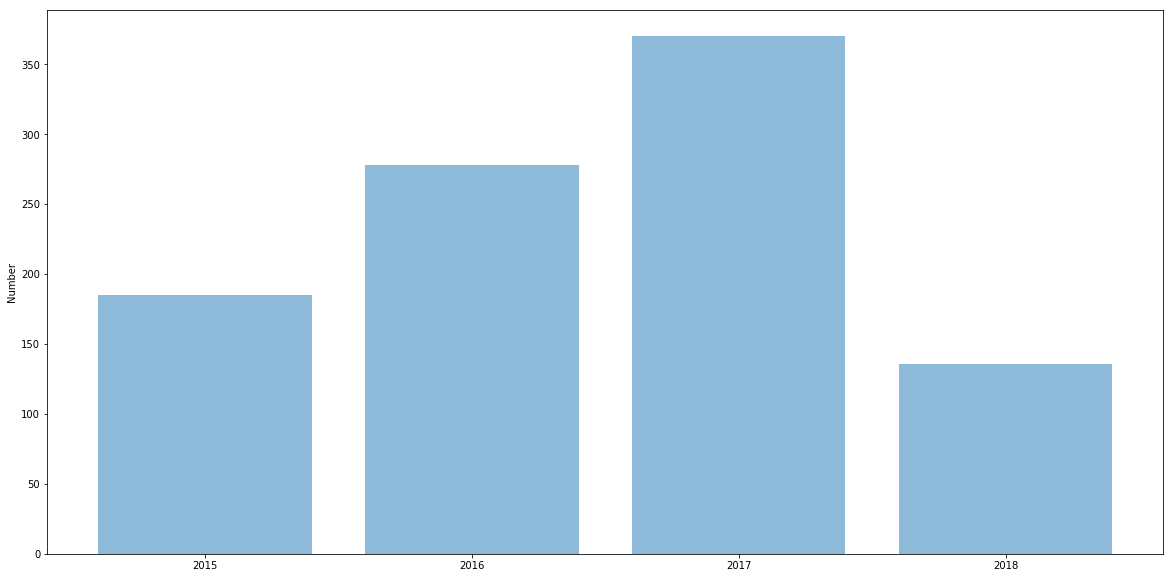

0

In [63]:
bar_chart(number_shoot_year,unique_shoot_year)

#### 5.6.2. Shooting & month

In [64]:
i = 1
list_month = list()

while i <= 12:
    list_month.append(len(df_shoot.loc[df_shoot['MONTH'] == i]))
    i+=1

In [65]:
# pie_plot(list(range(1,13)), list_month)

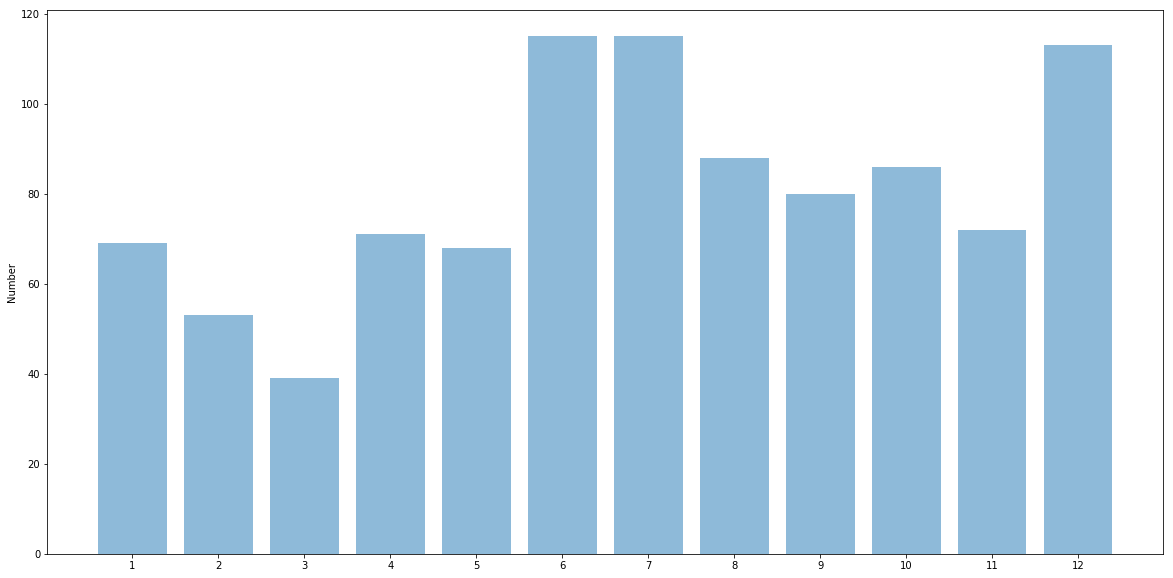

0

In [66]:
bar_chart(list_month,list(range(1,13)))

#### 5.6.3. Shooting & day of week

In [67]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

i = 0
day_number = list()

while i < 7:
    day_number.append(len(df_shoot.loc[df_shoot['DAY_OF_WEEK'] == day_of_week[i]]))
    
    i +=1

In [68]:
# pie_plot(day_of_week, day_number)

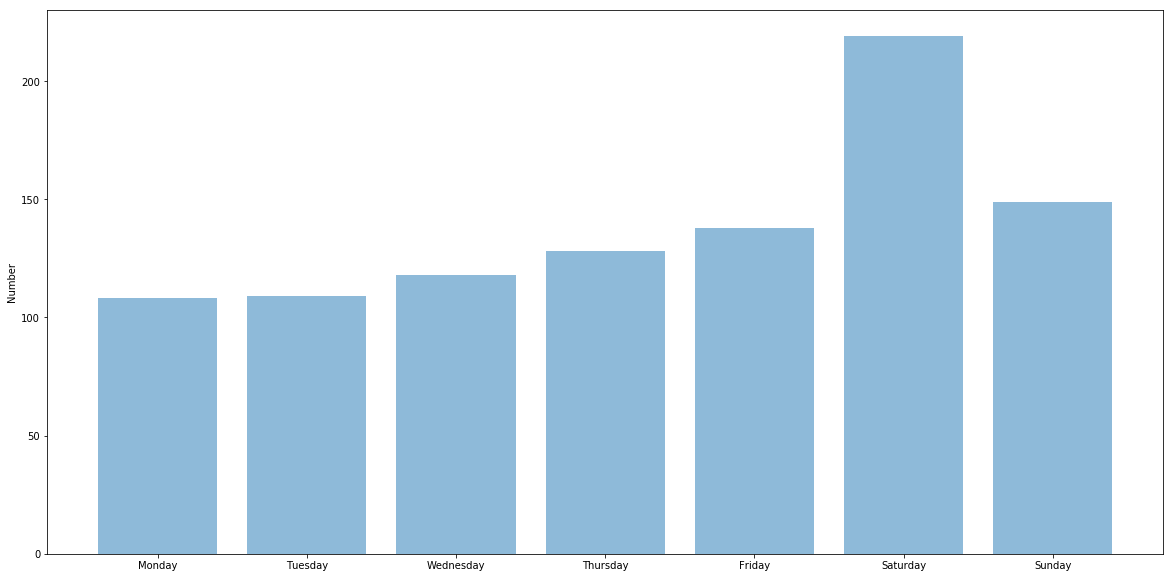

0

In [69]:
bar_chart(day_number,day_of_week)

#### 5.6.4. Shooting & hour

In [70]:
i = 0
hour_number = list()

while i < 24:
    hour_number.append(len(df_shoot.loc[df_shoot['HOUR'] == i]))
    i +=1

In [71]:
# pie_plot(list(range(0,24)), hour_number)

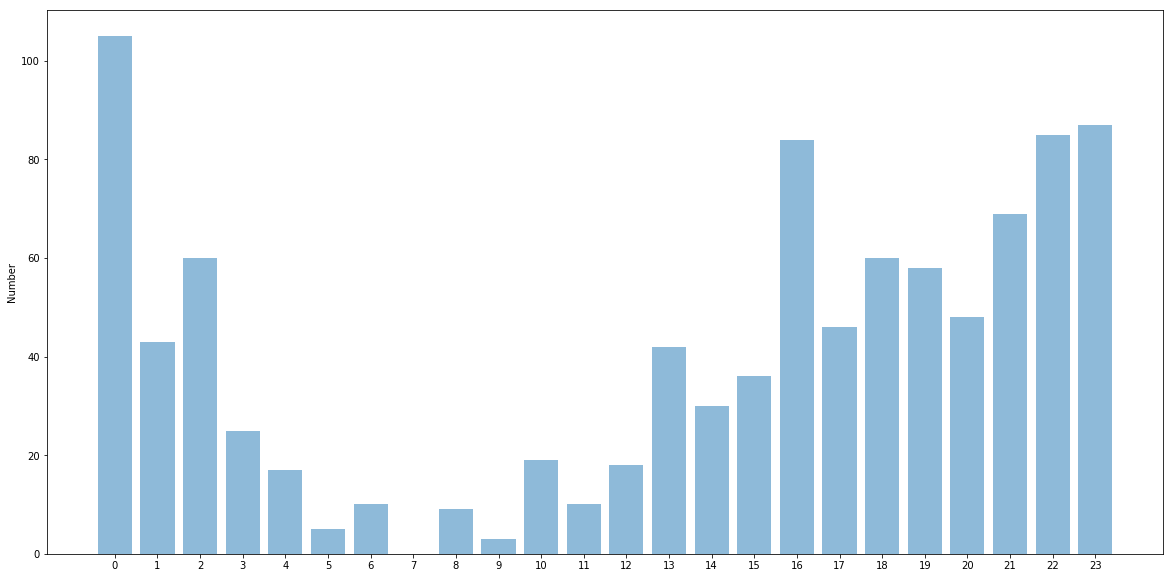

0

In [72]:
bar_chart(hour_number,list(range(0,24)))

#### 5.6.5. Shooting & District

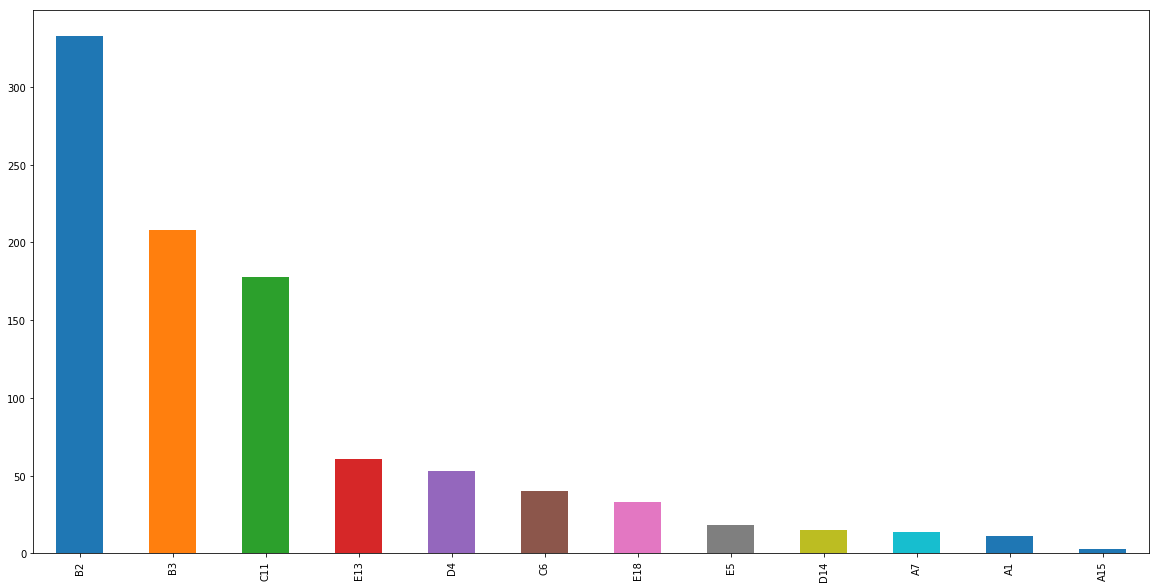

In [73]:
plt.figure(figsize=(20,10))
df_shoot['DISTRICT'].value_counts().plot.bar()
plt.show()

In [74]:
df.isnull().sum()

OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1643
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                 10618
Lat                    18839
Long                   18839
Location                   0
dtype: int64

In [75]:
df[['Lat','Long']].describe()

,Lat,Long
count,284532.000000,284532.000000
mean,42.221680,-70.920017
std,2.085899,3.374111
min,-1.000000,-71.178674
25%,42.297521,-71.097131
50%,42.325538,-71.077497
75%,42.348624,-71.062492
max,42.395042,-1.000000


In [76]:
df[['Lat','Long']].isnull().sum()

Lat     18839
Long    18839
dtype: int64

In [77]:
location = df[['Lat','Long']]
location = location.dropna()

In [78]:
location.isnull().sum()

Lat     0
Long    0
dtype: int64

In [79]:
lat = location['Lat']

long = location['Long']

In [80]:
from mpl_toolkits.basemap import Basemap

/home/olexandr/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/olexandr/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


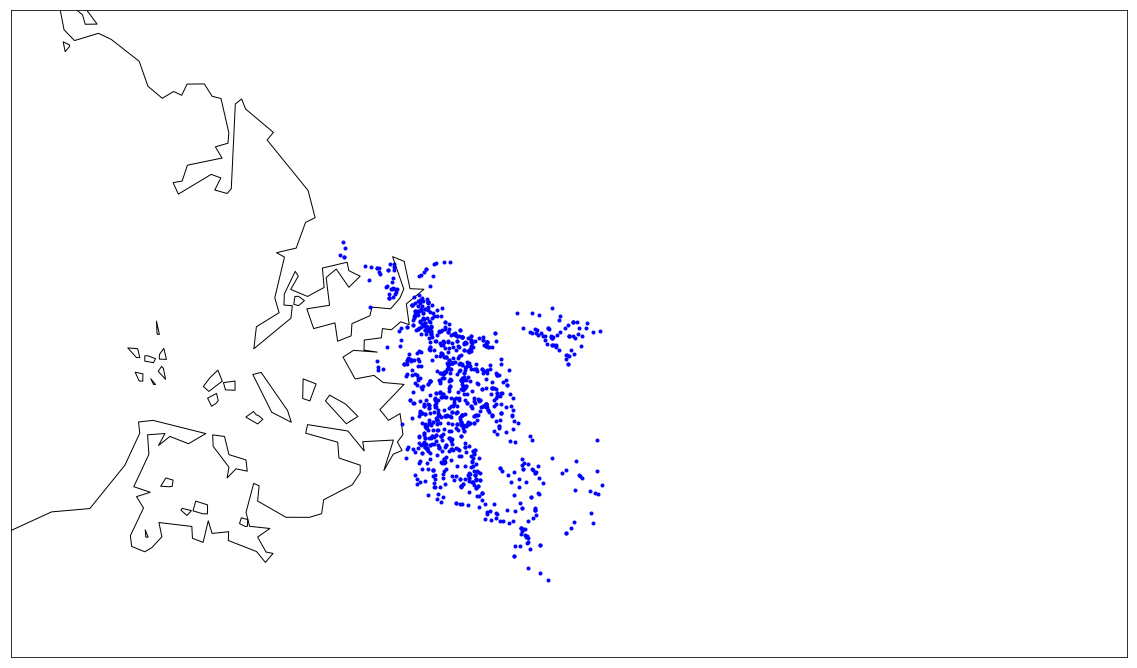

In [81]:
plt.figure(figsize=(20,20))

map = Basemap(
    projection='merc', 
    lat_0 = 42.2, 
    lon_0 = -70.9,
    resolution = 'h', 
    area_thresh = 0.1,
    llcrnrlon=-70.8, 
    llcrnrlat=42.2,
    urcrnrlon=-71.5, 
    urcrnrlat=42.5
)
 
map.drawcoastlines()
map.drawcountries()

lons = list(long[0:1000])
lats = list(lat[0:1000])
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=3)

plt.show()

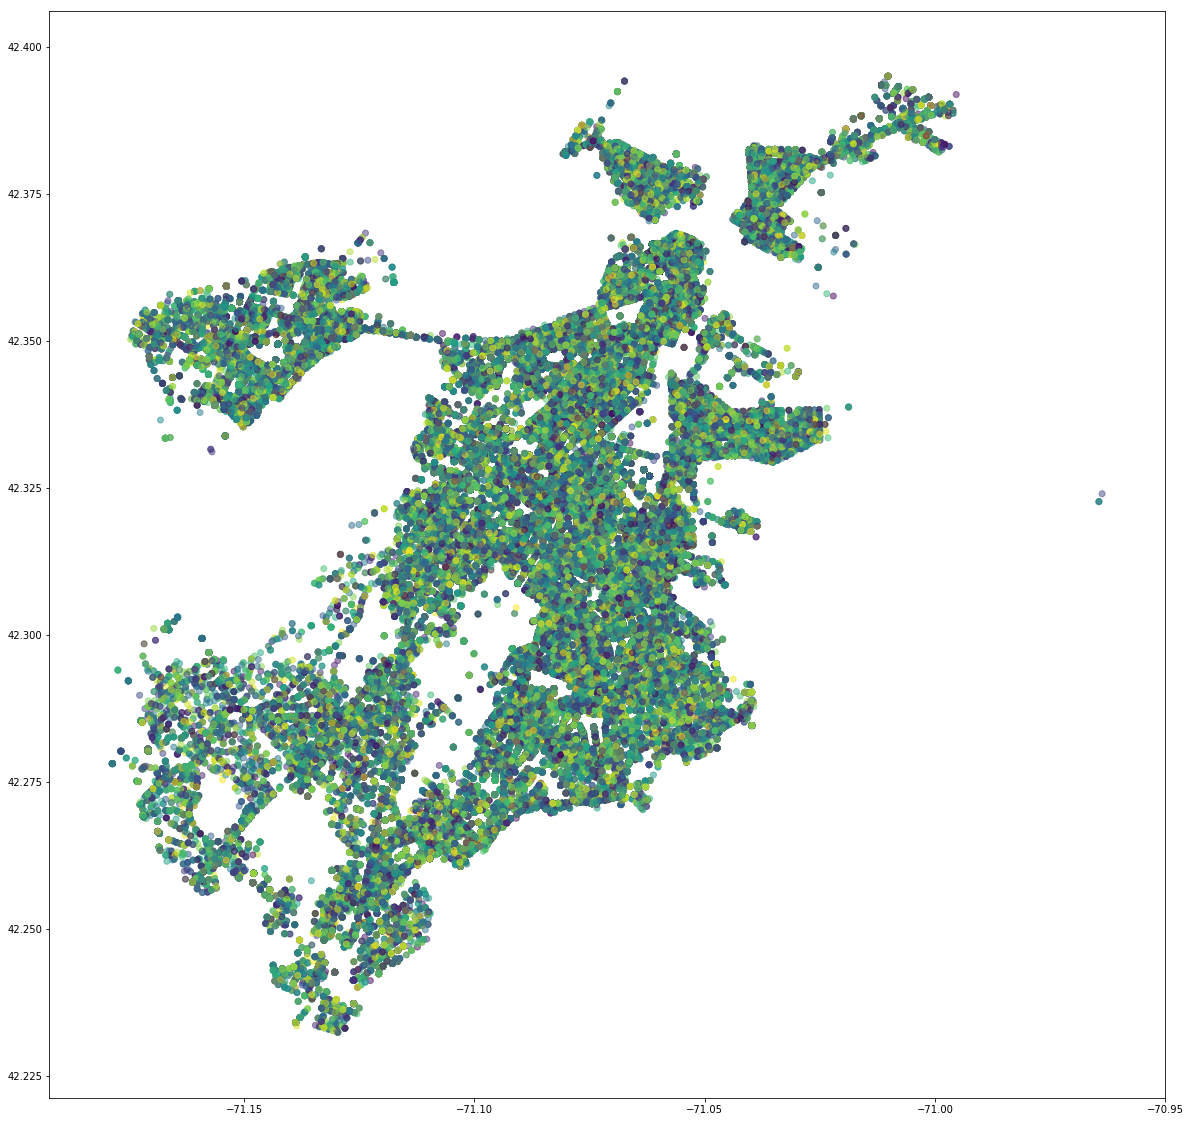

In [82]:
location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]  

x = location['Long']
y = location['Lat']


colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

# Create new var

###### Link

https://www.timeanddate.com/sun/usa/boston

In [87]:
day_night_period = [
    [1,6,18],
    [2,6,19],
    [3,6,20],
    [4,5,20],
    [5,5,21],
    [6,4,21],
    [7,5,21],
    [8,5,21],
    [9,6,20],
    [10,6,19],
    [11,6,17],
    [12,7,17]
]

In [88]:
df['Day'] = 0

i = 0

while i < 12:
    
    df['Day'].loc[
        (df['MONTH'] == day_night_period[i][0]) & 
        (df['HOUR'] >= day_night_period[i][1]) & 
        (df['HOUR'] <= day_night_period[i][2])
    ] = 1
    
    i +=1 
    

/home/olexandr/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [89]:
df['Night'] = 0
df['Night'].loc[df['Day']==0]=1

/home/olexandr/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


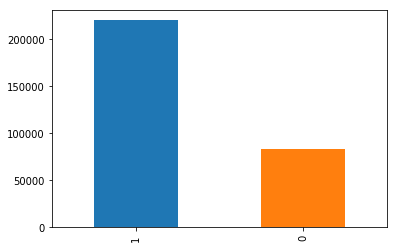

In [90]:
df['Day'].value_counts().plot.bar()
plt.show()

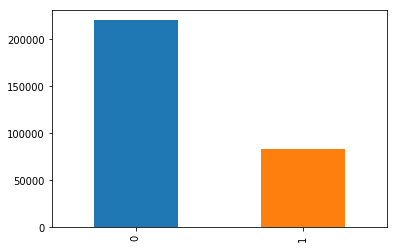

In [91]:
df['Night'].value_counts().plot.bar()
plt.show()

In [92]:
day_night_period

[[1, 6, 18],
 [2, 6, 19],
 [3, 6, 20],
 [4, 5, 20],
 [5, 5, 21],
 [6, 4, 21],
 [7, 5, 21],
 [8, 5, 21],
 [9, 6, 20],
 [10, 6, 19],
 [11, 6, 17],
 [12, 7, 17]]

In [93]:
df['ToNight'] = 0

i = 0

while i < 12:
    
    df['ToNight'].loc[
        (df['MONTH'] == day_night_period[i][0]) & 
        (df['Day']==1)
    ] = day_night_period[i][2] - df['HOUR'].loc[(df['MONTH'] == day_night_period[i][0]) & (df['Day']==1)]
    
    i +=1 
 

/home/olexandr/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


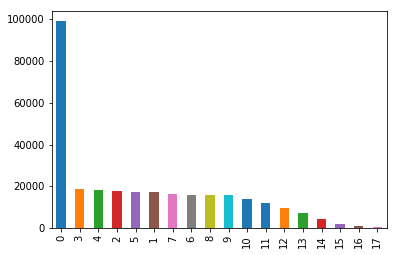

In [94]:
df['ToNight'].value_counts().plot.bar()
plt.show()

# 6. Modeling

In [97]:
list_offense_code_group = ('Motor Vehicle Accident Response',
                           'Larceny',
                           'Medical Assistance',
                           'Investigate Person',
                           'Other',
                           'Drug Violation',
                           'Simple Assault',
                           'Vandalism',
                           'Verbal Disputes',
                           'Towed',
                           'Investigate Property',
                           'Larceny From Motor Vehicle')

In [99]:
df_model = pd.DataFrame()

In [100]:
i = 0

while i < len(list_offense_code_group):

    df_model = df_model.append(df.loc[df['OFFENSE_CODE_GROUP'] == list_offense_code_group[i]])
    
    i+=1

In [101]:
len(df_model['OFFENSE_CODE_GROUP'].value_counts())

12

In [102]:
df_model.shape

(206791, 19)

In [103]:
df_model.columns

Index(['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location',
       'Day', 'Night', 'ToNight'],
      dtype='object')

### 6.1. First step. Modeling

In [105]:
list_column = ['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK',
               'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night']

In [106]:
df_model = df_model[list_column]

In [107]:
# DISTRICT

df_model['DISTRICT'] = df_model['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

df_model['DISTRICT'].unique()

array([  3.,   7.,   1.,  nan,  11.,   5.,   8.,   4.,   6.,  12.,   9.,
         2.,  10.])

In [108]:
# REPORTING_AREA

df_model['REPORTING_AREA'] = pd.to_numeric(df_model['REPORTING_AREA'], errors='coerce')

In [109]:
# MONTH

df_model['MONTH'].unique()

array([ 7,  6,  5,  4,  8, 11,  3, 12,  1,  2,  9, 10])

In [110]:
# DAY_OF_WEEK

df_model['DAY_OF_WEEK'] = df_model['DAY_OF_WEEK'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

df_model['DAY_OF_WEEK'].unique()

array([2, 6, 7, 1, 4, 5, 3])

In [111]:
# HOUR

df_model['HOUR'].unique()

array([18, 12, 17, 16, 11, 19, 14, 20, 15, 13,  7, 10,  9,  8,  5,  1, 22,
       21,  0,  6,  4,  2, 23,  3])

In [113]:
# Lat, Long

df_model[['Lat', 'Long']].head()

,Lat,Long
41,42.319408,-71.081405
43,42.322067,-71.112965
46,42.280292,-71.072206
56,-1.000000,-1.000000
57,42.287701,-71.106713


In [114]:
df_model.fillna(0, inplace = True)

In [115]:
x = df_model[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','Day','Night']]

In [116]:
y = df_model['OFFENSE_CODE_GROUP']

In [117]:
y.unique()

array(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault',
       'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property',
       'Larceny From Motor Vehicle'], dtype=object)

In [118]:
y = y.map({
    'Motor Vehicle Accident Response':1, 
    'Larceny':2, 
    'Medical Assistance':3,
    'Investigate Person':4, 
    'Other':5, 
    'Drug Violation':6, 
    'Simple Assault':7,
    'Vandalism':8, 
    'Verbal Disputes':9, 
    'Towed':10, 
    'Investigate Property':11,
    'Larceny From Motor Vehicle':12
})

##### Second var

In [119]:
df.columns

Index(['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location',
       'Day', 'Night', 'ToNight'],
      dtype='object')

In [120]:
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

df['DAY_OF_WEEK'].unique()

array([2, 6, 1, 7, 4, 3, 5])

In [121]:
# DISTRICT

df['DISTRICT'] = df['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

df['DISTRICT'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  nan,
        11.,  12.])

In [122]:
x = df[['OFFENSE_CODE','MONTH','DAY_OF_WEEK','HOUR','Day','Night']]

In [123]:
y = df['DISTRICT']

In [124]:
x.fillna(0, inplace = True)
y.fillna(0, inplace = True)

/home/olexandr/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [125]:
df['DISTRICT'].describe()

count    303371.000000
mean          6.136193
std           3.383968
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: DISTRICT, dtype: float64

#### 6.1.1. MNLogit

Documentation for model: https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.MNLogit.html

In [126]:
# mdl = sm.MNLogit(y, x)

In [127]:
# mdl_fit = mdl.fit()

In [128]:
# mdl_fit.summary()

#### 6.1.2. Split data for *sklearn.multiclass*

In [129]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(273033, 6) (273033,)
(30338, 6) (30338,)


#### 6.1.3. 

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [131]:
from sklearn.metrics import f1_score

In [132]:
# DecisionTreeClassifier
# 22.45

dec_tree = DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, Y_train)

dec_tree_pred = dec_tree.predict(X_test)

dec_tree_score = f1_score(Y_test, dec_tree_pred, average=None)
dec_tree_score

array([ 0.0052356 ,  0.18619547,  0.0852692 ,  0.21137349,  0.06189213,
        0.10362942,  0.08021077,  0.06423983,  0.14291282,  0.1846445 ,
        0.05507394,  0.17435184,  0.02244389])

In [133]:
# dec_tree_score = round(dec_tree.score(X_test, Y_test) * 100, 2)
# dec_tree_score

In [134]:
# BernoulliNB
# 16.94

bernoulli = BernoulliNB()
bernoulli = bernoulli.fit(X_train, Y_train)

bernoulli_pred = bernoulli.predict(X_test)

bernoulli_score = f1_score(Y_test, bernoulli_pred, average=None)
bernoulli_score

/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.        ,  0.        ,  0.        ,  0.27079935,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.08049142,  0.        ])

In [135]:
# ExtraTreeClassifier
# 22.66

ext_tree = ExtraTreeClassifier()
ext_tree = dec_tree.fit(X_train, Y_train)

ext_tree_pred = ext_tree.predict(X_test)

ext_tree_score = f1_score(Y_test, ext_tree_pred, average=None)
ext_tree_score

array([ 0.01028278,  0.18627776,  0.08481532,  0.21204351,  0.06033718,
        0.10418649,  0.08369915,  0.06642857,  0.14246718,  0.18592082,
        0.05535623,  0.17530435,  0.02244389])

In [136]:
# KNeighborsClassifier
# 21.91

neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train) 

neigh_pred = neigh.predict(X_test)

neigh_score = f1_score(Y_test, neigh_pred, average=None)
neigh_score

array([ 0.0270793 ,  0.19031978,  0.08324662,  0.22117647,  0.05310621,
        0.09968354,  0.07576244,  0.05451587,  0.14192169,  0.18853124,
        0.03565267,  0.1845197 ,  0.01381215])

In [137]:
# GaussianNB
# 13.76

gauss = GaussianNB()
gauss = gauss.fit(X_train, Y_train)

gauss_pred = gauss.predict(X_test)

gauss_score = f1_score(Y_test, gauss_pred, average=None)
gauss_score

/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.        ,  0.        ,  0.        ,  0.25260895,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.23831143,
        0.        ,  0.18001047,  0.        ])

In [138]:
# LinearDiscriminantAnalysis
# 18.53

lin_disc = LinearDiscriminantAnalysis()
lin_disc.fit(X_train, Y_train)

lin_disc_pred = lin_disc.predict(X_test)

lin_disc_score = f1_score(Y_test, lin_disc_pred, average=None)
lin_disc_score

/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.        ,  0.        ,  0.        ,  0.26087628,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.23760171,
        0.        ,  0.12131015,  0.        ])

In [139]:
# NearestCentroid

nnc = NearestCentroid()
nnc = nnc.fit(X_train, Y_train)

nnc_pred = nnc.predict(X_test)

nnc_score = f1_score(Y_test, nnc_pred, average=None)
nnc_score

/home/olexandr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.0124086 ,  0.        ,  0.00121655,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00926355,  0.24950495,
        0.        ,  0.00584966,  0.        ])

In [140]:
# RandomForestClassifier

rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, Y_train)

rfc_pred = rfc.predict(X_test)

rfc_score = f1_score(Y_test, rfc_pred, average=None)
rfc_score

array([ 0.        ,  0.15733912,  0.08034818,  0.21168794,  0.06186519,
        0.09682081,  0.06966618,  0.06880582,  0.15867419,  0.19672517,
        0.07055749,  0.19574225,  0.01943635])

In [141]:
# LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train, Y_train)

clf_pred = clf.predict(X_test)

clf_score = f1_score(Y_test, clf_pred, average=None)
clf_score

array([ 0.01226994,  0.16785097,  0.0060024 ,  0.27920347,  0.02503912,
        0.02736212,  0.04105012,  0.00471976,  0.15942029,  0.27758301,
        0.00884956,  0.25875462,  0.0066335 ])